# PROBLEM STATEMENT:
- BSA cycles a famous bicycle company has collected the data of sharing of bicycle for two consecutive years. With this data they want to do an analysis on how the sharing of the bicycle happens in different environmental and seasonal changes. Thereby, they even want to predict the sharing of the data for the upcoming year. Hence, the goal of the study is to build a system and come up with the prediction for the following year.

# OBJECTIVE:
- 1. To analyse different environmental conditions which are affecting the count of users for bicycle sharing.
- 2. To consider all the factors and come out with best features, which are related most with the users of bicycle sharing.
- 3. To give a clear view of the analysis to BSA Cycles, so that it can help the company to improve their bicycle sharing business.
- 4. To help BSA cycles with a prediction model based on the factors given for the upcoming year.

# HYPOTHESIS:
- Various hypothesis were taken into consideration while analysing each of the data features.

# PERFORMING EXPLORATORY DATA ANALYSIS:

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

## Getting the dataset

In [2]:
data=pd.read_csv(r"C:\Users\S.Joshi\Desktop\Data Science\ML Assignment-1\Bicycle_rental_prediction\day_lease.csv")
data.head()
# Checking the uploaded data

,item,dteday,spell,yr,mnth,sabbatical,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cas,reg,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.shape

(731, 16)

In [4]:
data.size

11696

## Checking for null values

In [5]:
data.isnull().any()
# There are no null values

item          False
dteday        False
spell         False
yr            False
mnth          False
sabbatical    False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cas           False
reg           False
cnt           False
dtype: bool

## Feature Analysis

In [6]:
# Showing all the column names
data.columns

Index(['item', 'dteday', 'spell', 'yr', 'mnth', 'sabbatical', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cas',
       'reg', 'cnt'],
      dtype='object')

In [7]:
data['dteday'].dtype

dtype('O')

In [8]:
# Converting the dteday column from string to date time format
data['dteday']=pd.to_datetime(data['dteday'])
data['dteday'].head()

0   2011-01-01
1   2011-02-01
2   2011-03-01
3   2011-04-01
4   2011-05-01
Name: dteday, dtype: datetime64[ns]

In [9]:
pd.DatetimeIndex(data['dteday']).year.value_counts()

2012    366
2011    365
Name: dteday, dtype: int64

In [10]:
data['yr'].value_counts()

1    366
0    365
Name: yr, dtype: int64

In [11]:
data['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

### Since yr(year) and mnth(month) are giving the same values as dtdate, so not considering dtdate column to 

In [12]:
data['spell'].unique()
# 1:springer, 2:summer, 3:fall, 4:winter

array([1, 2, 3, 4], dtype=int64)

In [78]:
# Count of bicycles rented during each season
season=data.groupby('spell')['cnt'].mean().reset_index()
season.columns=['Season','Count']
season['Season']=['Springer','Summer','Fall','Winter']
season

,Season,Count
0,Springer,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


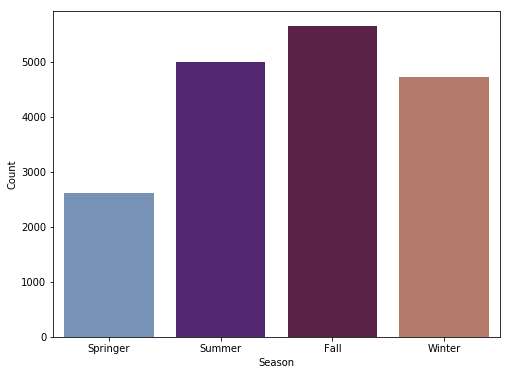

In [79]:
plt.figure(figsize=(8,6))
sb.barplot(season['Season'],season['Count'],palette='twilight')
# This shows that in Fall season maximum bicycles were shared

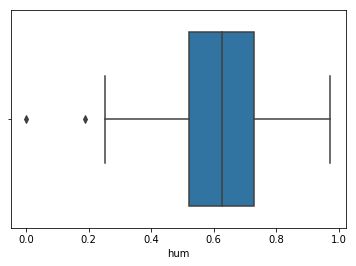

In [16]:
# Checking for outliers
sb.boxplot(data['hum'])

In [17]:
# Defining a function to remove the outliers
def outliers(name):
    q1=data[name].quantile(0.25)
    q3=data[name].quantile(0.75)
    iqr=q3-q1
    ub=q3+(iqr*1.5)
    lb=q1-(iqr*1.5)
    data[name]=data[name].replace(data[data[name]<lb][name],data[name].quantile(0.01))
    data[name]=data[name].replace(data[data[name]>ub][name],data[name].quantile(0.99))

In [18]:
outliers('hum')

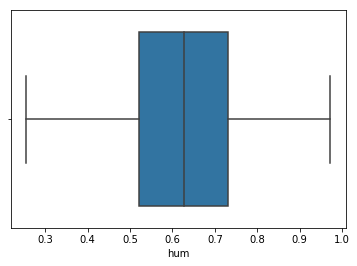

In [19]:
sb.boxplot(data['hum'])

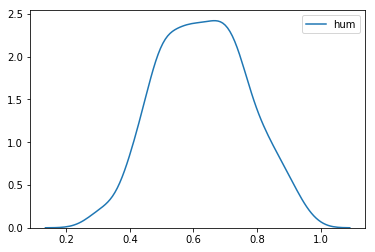

In [20]:
sb.kdeplot(data['hum'])

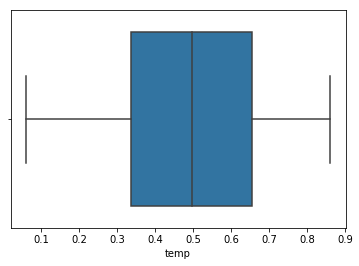

In [21]:
sb.boxplot(data['temp'])
# Normalised data

In [22]:
data['atemp'].describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

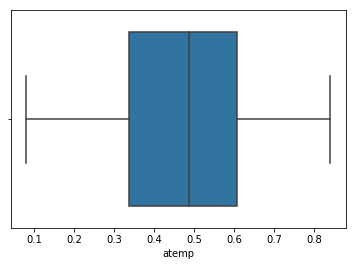

In [23]:
sb.boxplot(data['atemp'])
# Right Skewed data

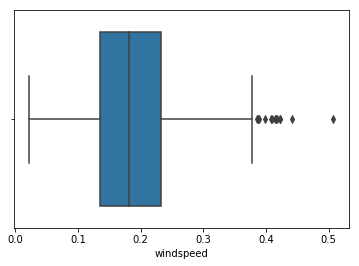

In [24]:
sb.boxplot(data['windspeed'])
# Outliers in windspeed column

In [25]:
# Removing outliers
outliers('windspeed')

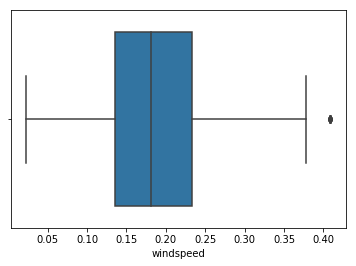

In [26]:
sb.boxplot(data['windspeed'])

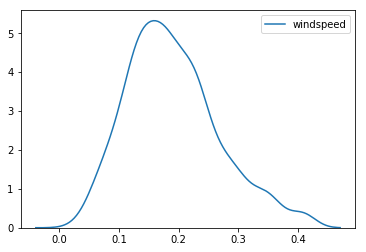

In [27]:
# Probability Density Curve
sb.kdeplot(data['windspeed'])

In [28]:
# Applying ANOVA on spell(season) and cnt to check the dependency of season on the number of bicycles rented
# NULL HYPOTHESES: mean number of bicycles rented for all seasons are equal
# ALTERNATE HYPOTHESES: mean number of bicycles rented for all seasons are not equal
f_oneway(data[data['spell']==1]['cnt'],data[data['spell']==2]['cnt'],data[data['spell']==3]['cnt'],data[data['spell']==3]['cnt'])

# p value is very less than 0.05, so null hypotheses is rejected meaning that there is different number of bicycles
# rented through all seasons


F_onewayResult(statistic=167.8049340210731, pvalue=6.66046507684372e-83)

In [29]:
# plt.figure(figsize=(8,6))
# sb.barplot(data['spell'],data['cnt'],palette='winter')
# plt.xlabel("Season")
# plt.ylabel("Count of Bikes rented")
# # plt.bar(data['spell'],data['cnt'])
# # set_xticklabels(['Spring','Summer','Fall','Winter'])

In [30]:
data['sabbatical'].value_counts()

0    710
1     21
Name: sabbatical, dtype: int64

In [31]:
# How many bicycle was rented on a holiday?
total_sab=data.groupby('sabbatical')['cnt'].sum().reset_index()
total_sab.columns=['Sabbatical','Count']
total_sab
# More number of bicycles are shared when there is no holiday
# The count of bicycles also increases from 2011 to 2012

,Sabbatical,Count
0,0,3214244
1,1,78435


In [32]:
data['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [33]:
total_workday=data.groupby('workingday')['cnt'].sum().reset_index()
total_workday.columns=['Working Day','Count']
total_workday
# More number of bicycles were rented on working days

,Working Day,Count
0,0,1000269
1,1,2292410


In [34]:
data[data['workingday']==1]['weekday'].unique()
# This shows that working days are from Monday to Friday(1 to 5)

array([1, 2, 3, 4, 5], dtype=int64)

In [35]:
total_weekday=data.groupby('weekday')['cnt'].sum().reset_index()
total_weekday.columns=['Weekday','Count']
total_weekday['Weekday']=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
total_weekday
# The table shows the distribution of the count of bicycles on different days

,Weekday,Count
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


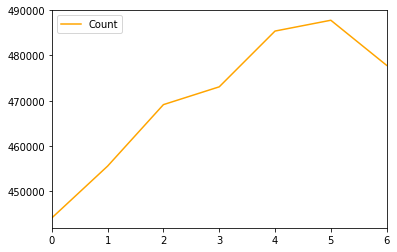

In [36]:
plt.figure()
total_weekday.plot(kind='line',legend='True',color='orange')

In [37]:
total_weekday[total_weekday['Count']==max(total_weekday['Count'])]
# Maximum number of bicycles were rented on Friday's

,Weekday,Count
5,Friday,487790


In [38]:
data[data['sabbatical']==1][['sabbatical','weekday','workingday']].head()
# We can see that when sabbatical=1, then working day=0 (be it any day of the week)

,sabbatical,weekday,workingday
16,1,1,0
51,1,1,0
104,1,5,0
149,1,1,0
184,1,1,0


In [39]:
data[data['sabbatical']==0][['sabbatical','weekday','workingday']].head()

,sabbatical,weekday,workingday
0,0,6,0
1,0,0,0
2,0,1,1
3,0,2,1
4,0,3,1


In [40]:
# When sabbatical=0,working day=1 for weekdays 1-5(Monday to Friday working) and working day=0  for weekday 0,6(Saturday,Sunday)
# So we can see that working day is explaining the count most among sabbatical,weekdays and workingday 

In [41]:
# Applying CHI SQUARE test on categorical variables
# Looking for dependency for sabbatical and working day
# NULL HYPOTHESES: Sabbatical and working day are independent
# ALTERNATE HYPOTHESES: Sabatical and working day are not independent
table=pd.crosstab(index=data['workingday'],columns=data['sabbatical'])
chi2_contingency(table)

# p value < 0.05 so null hypotheses is rejected implying that sabbatical and working day are depending on each other

(43.597582013146706,
 4.033370935452143e-11,
 1,
 array([[224.36388509,   6.63611491],
        [485.63611491,  14.36388509]]))

In [42]:
data['weathersit'].unique()
# 1. Clear, 2- Mist, 3- Light Snow, 4- Heavy Rain

array([2, 1, 3], dtype=int64)

In [43]:
weather=data.groupby('weathersit')['cnt'].sum().reset_index()
weather.columns=['Weather','Count']
weather['Weather']=['Clear','Mist','Light Snow']
weather

,Weather,Count
0,Clear,2257952
1,Mist,996858
2,Light Snow,37869


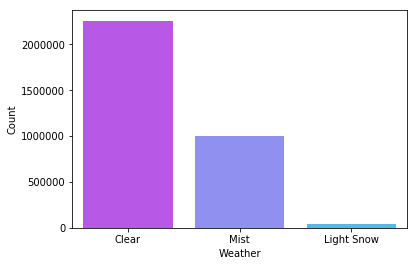

In [44]:
sb.barplot(weather['Weather'],weather['Count'],palette='cool_r')
# Under Clear weather conditions bicycle renting is more

In [45]:
season_weather=data.groupby(['spell','weathersit'])['cnt'].sum().reset_index()
season_weather.columns=['Season','Weather','Count']
season_weather

,Season,Weather,Count
0,1,1,312036
1,1,2,155573
2,1,3,3739
3,2,1,626986
4,2,2,288096
5,2,3,3507
6,3,1,799443
7,3,2,250679
8,3,3,11007
9,4,1,519487


Text(0, 0.5, 'Count')

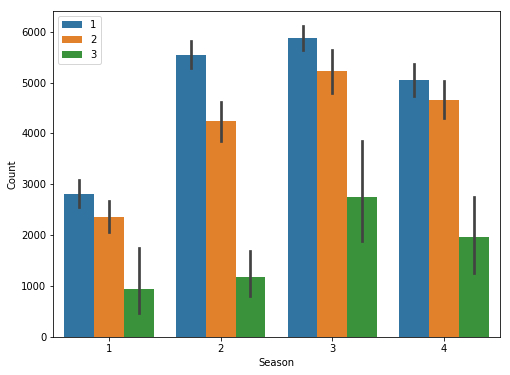

In [82]:
# plot graph for season weather sit and count
plt.figure(figsize=(8,6))
sb.barplot(data['spell'],data['cnt'],hue=data['weathersit'])
plt.legend(loc='upper left')
plt.xlabel("Season")
plt.ylabel("Count")

In [47]:
# Applying ANOVA on weathersit(weather conditions) and cnt to check the dependency of weather conditions
# on the number of bicycles rented
# NULL HYPOTHESES: mean number of bicycles rented for all weather conditions are equal
# ALTERNATE HYPOTHESES: mean number of bicycles rented for all weather conditions are not equal
f_oneway(data[data['weathersit']==1]['cnt'],data[data['weathersit']==2]['cnt'],data[data['weathersit']==3]['cnt'])

# p value is very less than 0.05, so null hypotheses is rejected meaning that there is different number of bikes
# rented through all weather conditions


F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

Text(0, 0.5, 'Count')

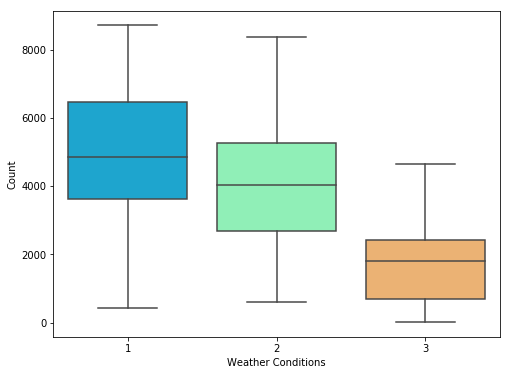

In [48]:
plt.figure(figsize=(8,6))
sb.boxplot(data['weathersit'],data['cnt'],palette='rainbow')
plt.xlabel("Weather Conditions")
plt.ylabel("Count")

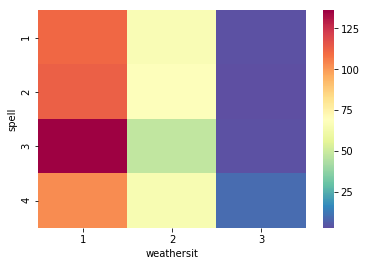

In [49]:
sb.heatmap(pd.crosstab(index=data['spell'],columns=data['weathersit']),cmap='Spectral_r')
# This heatmap shows the which weather condition prevails the most during each season.

In [84]:
month_weather=data.groupby(['mnth','weathersit'])['cnt'].sum().reset_index()
month_weather.columns=['Month','Weather','Count']
month_weather

,Month,Weather,Count
0,1,1,87391
1,1,2,47036
2,1,3,506
3,2,1,105048
4,2,2,44135
5,2,3,2169
6,3,1,139989
7,3,2,86623
8,3,3,2308
9,4,1,197149


In [53]:
p=[]
q=[]
for i in range(1,13):
    month_max=month_weather[month_weather['Month']==i]['Count'].max()
    p.append(month_max)
    month=month_weather[(month_weather['Month']==i) & (month_weather['Count']==month_max)]['Weather']
    g=dict(month)
    q.append(list(g.values()))

month=[]
for i in (q):
    for r in i:
        month.append(r)
print(p)
print(month)

[87391, 105048, 139989, 197149, 210838, 278830, 281366, 250921, 222200, 187497, 184625, 112098]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [56]:
month_weekday=data.groupby(['mnth','weekday'])['cnt'].sum().reset_index()
month_weekday.columns=['Month','Weekday','Count']
# month_weekday

In [57]:
k=[]
b=[]
for i in range(1,13):
    month_max=month_weekday[month_weekday['Month']==i]['Count'].max()
    k.append(month_max)
    day=month_weekday[(month_weekday['Month']==i) & (month_weekday['Count']==month_max)]['Weekday']
    n=dict(day)
    b.append(list(n.values()))
print(k)
print(b)

[23110, 25320, 38170, 40642, 53034, 57094, 52981, 60769, 57543, 49543, 40713, 33682]
[[2], [3], [4], [1], [4], [6], [0], [3], [6], [3], [5], [5]]


In [58]:
day=[]
for i in (b):
    for a in i:
        day.append(a)

In [85]:
maxday=pd.DataFrame()
maxday['Month']=[1,2,3,4,5,6,7,8,9,10,11,12]
maxday['Weekday']=day
maxday['Maximum Count']=k
maxday

,Month,Weekday,Maximum Count
0,1,2,23110
1,2,3,25320
2,3,4,38170
3,4,1,40642
4,5,4,53034
5,6,6,57094
6,7,0,52981
7,8,3,60769
8,9,6,57543
9,10,3,49543


Text(0, 0.5, 'Count of Bikes rented')

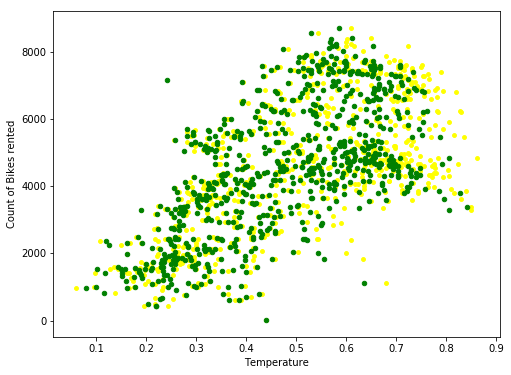

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(data['temp'],data['cnt'],color='yellow',s=15)
plt.scatter(data['atemp'],data['cnt'],color='green',s=20)
plt.xlabel("Temperature")
plt.ylabel("Count of Bikes rented")
# Scatter plot shows the high relation between temp and atemp, so to avoid redundancy, dropping atemp

In [63]:
data[['temp','atemp','hum','windspeed','cnt']].corr()
# Now from the correlation it can be seen that temp and atemp is highly related, ie, we can drop atemp column to avoid redundancy
# Humidity is inversely related to count, ie if humidity increases count decreases as humidity increases chances of rain
# and vice versa
# Same with windspeed, count decreases as windspeed increases
# So we can take any one from wind speed and humidity

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126260,-0.157767,0.627494
atemp,0.991702,1.000000,0.139590,-0.183663,0.631066
hum,0.126260,0.139590,1.000000,-0.241390,-0.109894
windspeed,-0.157767,-0.183663,-0.241390,1.000000,-0.233858
cnt,0.627494,0.631066,-0.109894,-0.233858,1.000000


In [64]:
f_oneway(data[data['yr']==0]['cnt'],data[data['yr']==1]['cnt'])

F_onewayResult(statistic=344.8905855356836, pvalue=2.4835399044509515e-63)

In [65]:
data.groupby('yr')['cnt'].sum()
# 0-2011
# 1-2012
# Overall there is an increase in the business from 2011 to 2012

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

In [66]:
# Seperating all the independent and dependent variables
x=data[['yr','mnth','spell','workingday','weathersit','temp','hum','windspeed']]
x.head()

,yr,mnth,spell,workingday,weathersit,temp,hum,windspeed
0,0,1,1,0,2,0.344167,0.805833,0.160446
1,0,1,1,0,2,0.363478,0.696087,0.248539
2,0,1,1,1,1,0.196364,0.437273,0.248309
3,0,1,1,1,1,0.200000,0.590435,0.160296
4,0,1,1,1,1,0.226957,0.436957,0.186900


In [67]:
y=data['cnt']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [68]:
# Splitting the data inot test set and the training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
x_train.shape

(584, 8)

In [70]:
x_test.shape

(147, 8)

## Applying Linear Regression

In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr.coef_

array([ 1966.97710613,   -28.72552764,   465.6091973 ,   111.93049927,
        -500.34414682,  5296.19010386, -1353.85345942, -3029.28214942])

In [73]:
lr.intercept_

1970.001350153941

In [74]:
y_pred=lr.predict(x_test)

In [75]:
lr.score(x_train,y_train)*100

78.91850674110346

In [76]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE:",rmse)
print("R2:",r2)
# R2 value shows that 79.6% of the variation in dependent variable is explained by the independent variables

RMSE: 931.2638691186881
R2: 0.7960914012139393


Text(0.5, 1.0, 'Residual Plot')

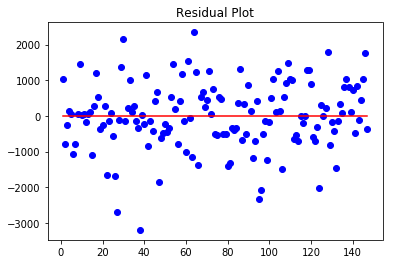

In [77]:
# Plotting residual plot
x=[i for i in range(1,len(y_pred)+1)]
plt.scatter(x,(y_test-y_pred),color='blue')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
# Since there is no pattern in the residual plot so it is a linear model